In [162]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline


In [163]:
df=pd.read_csv('sampleSubmission.csv')
df.head()

,Id,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [164]:
pd_train= pd.read_csv('train.csv')
pd_train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [165]:
pd_train.groupby("Category")["Category"].count().sort_values(ascending=False)

Category
LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQ

Showing the Crime category count,crimes by district and crimes by day using sns

/Users/siddhant/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


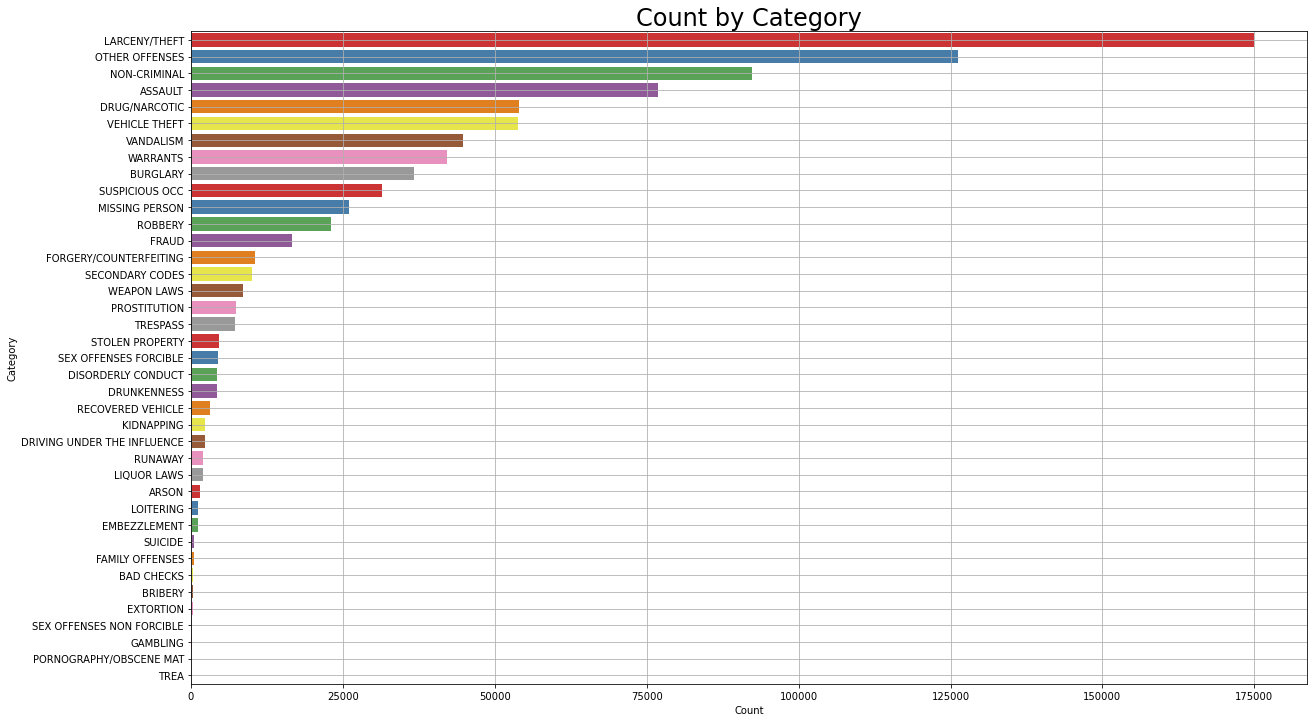

In [166]:
data = pd_train.groupby('Category').count()
data = data['Dates'].sort_values(ascending=False)

plt.figure(figsize=(20, 12))
ax = sns.barplot(data.values ,data.index,palette='Set1')

plt.title('Count by Category', fontdict={'fontsize': 24})
plt.xlabel('Count')
plt.grid()

[Text(0, 0, 'SOUTHERN'),
 Text(1, 0, 'MISSION'),
 Text(2, 0, 'NORTHERN'),
 Text(3, 0, 'BAYVIEW'),
 Text(4, 0, 'CENTRAL'),
 Text(5, 0, 'TENDERLOIN'),
 Text(6, 0, 'INGLESIDE'),
 Text(7, 0, 'TARAVAL'),
 Text(8, 0, 'PARK'),
 Text(9, 0, 'RICHMOND')]

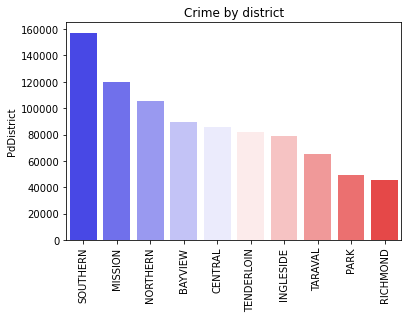

In [167]:
district = pd_train.PdDistrict.value_counts()
plt.title("Crime by district")

plot = sns.barplot(x=district.index,y=district,palette='bwr')
plot.set_xticklabels(district.index,rotation=90)


/var/folders/gj/6w82t4757zjcl7v6tv4k4xdc0000gn/T/ipykernel_32659/191476084.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(day_of_crimes.index,rotation=90)
/var/folders/gj/6w82t4757zjcl7v6tv4k4xdc0000gn/T/ipykernel_32659/191476084.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(day_of_crimes.index,rotation=90)


[Text(0, 0, 'Friday'),
 Text(1, 0, 'Wednesday'),
 Text(2, 0, 'Saturday'),
 Text(3, 0, 'Thursday'),
 Text(4, 0, 'Tuesday'),
 Text(5, 0, 'Monday'),
 Text(6, 0, 'Sunday')]

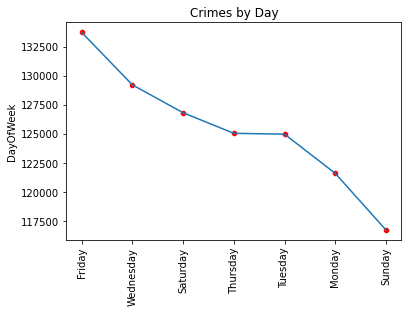

In [168]:
day_of_crimes = pd_train.DayOfWeek.value_counts()
plt.title("Crimes by Day")
plot = sns.scatterplot(x=day_of_crimes.index,y=day_of_crimes, color='red')
plot.set_xticklabels(day_of_crimes.index,rotation=90)

plot = sns.lineplot(x=day_of_crimes.index,y=day_of_crimes)
plot.set_xticklabels(day_of_crimes.index,rotation=90)

In [169]:
pd_test= pd.read_csv('test.csv')
pd_test.head()

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


Using label Encoder to create numerical labels for strings

In [170]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()

pd_train["DayOfWeek"] = l.fit_transform(pd_train["DayOfWeek"])
pd_train["PdDistrict"] = l.fit_transform(pd_train["PdDistrict"])
pd_train["Address"] = l.fit_transform(pd_train["Address"])

In [171]:
pd_test["DayOfWeek"] = l.fit_transform(pd_test["DayOfWeek"])
pd_test["PdDistrict"] = l.fit_transform(pd_test["PdDistrict"])
pd_test["Address"] = l.fit_transform(pd_test["Address"])

In [172]:
from sklearn.model_selection import train_test_split
x_train = pd_train[['DayOfWeek', 'PdDistrict', 'Address', 'X', 'Y']]
y_train =pd_train["Category"]
x_test = pd_test[['DayOfWeek', 'PdDistrict', 'Address', 'X', 'Y']]

Making a decision tree classifier model

In [173]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [174]:
predictions = dtree.predict(x_test)

In [175]:
result = pd.DataFrame(index= pd_test.Id, columns=dtree.classes_, data=dtree.predict_proba(x_test))

result.to_csv("submission.csv", index_label='Id')
result.head()

,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
Id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.333333,0.0,0.000000,0.0,0.000000,0.000000,0.000000
1,0.0,0.055556,0.0,0.0,0.0,0.0,0.055556,0.055556,0.0,0.0,...,0.0,0.0,0.0,0.111111,0.0,0.055556,0.0,0.055556,0.111111,0.055556
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.500000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
3,0.0,0.500000,0.0,0.0,0.1,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.100000,0.000000
4,0.0,0.500000,0.0,0.0,0.1,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.100000,0.000000


Making a Random Forest Classifier model

In [176]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [177]:
rfc_pred = rfc.predict(x_test)

In [178]:
result2= pd.DataFrame(index= pd_test.Id, columns=rfc.classes_, data=rfc.predict_proba(x_test))

result2.to_csv("submission2.csv", index_label='Id')
result2.head()

,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
Id,,,,,,,,,,,,,,,,,,,,,
0,0.000625,0.111650,0.0,0.0,0.044187,0.0,0.000000,0.001479,0.0,0.0,...,0.0,0.00000,0.0,0.073941,0.0,0.034560,0.027500,0.330000,0.000000,0.004793
1,0.000000,0.195752,0.0,0.0,0.000000,0.0,0.030111,0.062924,0.0,0.0,...,0.0,0.00692,0.0,0.082708,0.0,0.031156,0.000000,0.129765,0.085279,0.023109
2,0.000000,0.011214,0.0,0.0,0.100333,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.00000,0.0,0.325346,0.0,0.000000,0.039451,0.029252,0.000000,0.000000
3,0.000000,0.447038,0.0,0.0,0.077599,0.0,0.000000,0.014679,0.0,0.0,...,0.0,0.00000,0.0,0.000000,0.0,0.008806,0.005323,0.011818,0.097213,0.000000
4,0.000000,0.447038,0.0,0.0,0.077599,0.0,0.000000,0.014679,0.0,0.0,...,0.0,0.00000,0.0,0.000000,0.0,0.008806,0.005323,0.011818,0.097213,0.000000
